## Prompt:

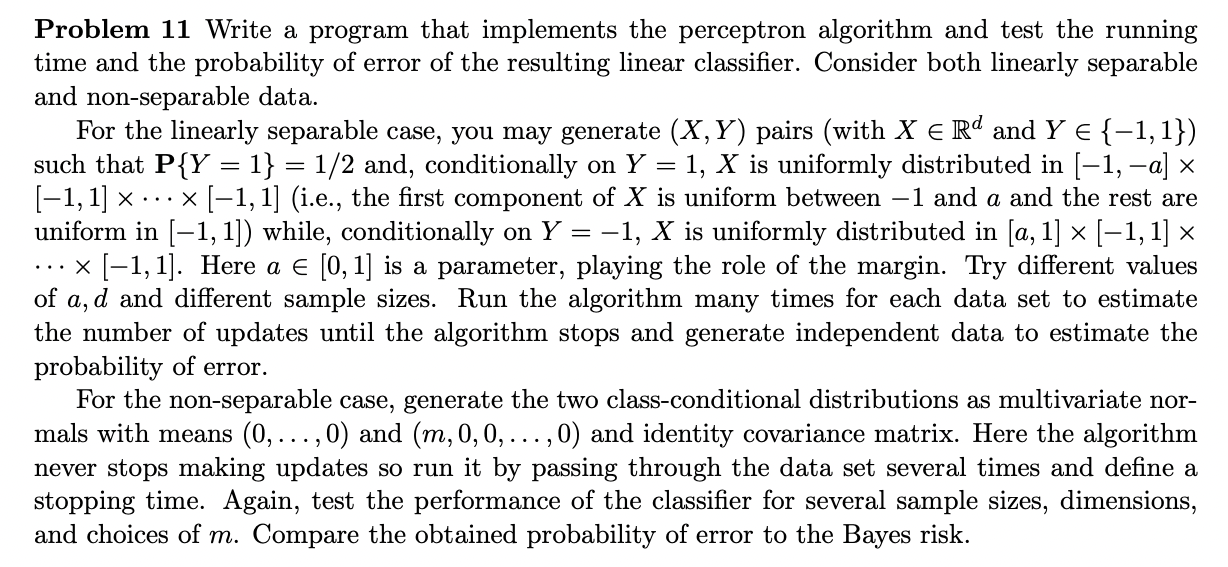

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from statistics import mean

## Functions:

Generate Linearly Separable Points:

array([[-0.58799355,  0.76859999, -0.21917321,  0.0789114 ,  1.        ],
       [-0.9362257 ,  0.84272516,  0.60280028,  0.26885583,  1.        ],
       [-0.91017805, -0.09642659, -0.93986831, -0.98335265,  1.        ],
       ...,
       [-0.3010733 , -0.83183103, -0.90903117, -0.43973188,  1.        ],
       [-0.95339676, -0.08324882,  0.15116739,  0.70980417,  1.        ],
       [ 0.22853858, -0.14947925, -0.90870113,  0.77613252, -1.        ]])

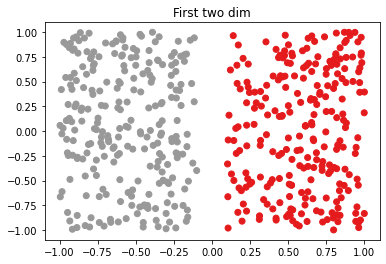

In [3]:
def generate_LS(n, d, a, show = ""):

  # 1. Generate a 1 x n vector with equally probable -1s and 1s:
  y = np.transpose(np.random.choice([-1, 1], size = (1, n), p = [1/2, 1/2]))

  # 2. Generate X:

  # 2.1. First row - later on discarded
  X = np.zeros(d)
  
  # 2.2. Following rows depend on y:
  for element in y:
    if element == 1:
      X_1st = np.random.uniform(low = -1, high = -a, size = (1, 1))
      X_rest = np.random.uniform(low = -1, high = 1, size = (1, d-1))
      X_element = np.hstack((X_1st,X_rest))
      X = np.vstack((X, X_element))
    else:
      X_1st = np.random.uniform(low = a, high = 1, size = (1, 1))
      X_rest = np.random.uniform(low = -1, high = 1, size = (1, d-1))
      X_element = np.hstack((X_1st,X_rest))
      X = np.vstack((X, X_element))
  
  # 2.3. Delete first row
  X = np.delete(X, 0, axis = 0)

  if show == "show":
    # 3. Generate results:
    results = np.hstack((X, y))

    # 4. Plot first 2 dimensions:
    plt.scatter(results.T[0], results.T[1], c = results.T[d], cmap = "Set1")
    plt.title("First two dim")  

  return X, y

X, y = generate_LS(n = 500, d = 4, a = 0.1, show = "show")
np.hstack((X, y))

Generate Non Linearly Separable Points:

array([[ 2.35263547,  0.34729846, -2.03246119, -1.211051  , -1.        ],
       [ 0.83949451, -0.74571626, -0.05595479, -3.46484454,  1.        ],
       [-0.11502842,  0.80662839, -0.28343312, -0.18087906,  1.        ],
       ...,
       [-0.52821546, -1.71404031,  2.16246545, -0.820531  ,  1.        ],
       [-0.46854849,  0.67523941, -0.51020043, -0.60243221,  1.        ],
       [ 0.63804737,  0.44836781, -1.72410562, -1.14651471,  1.        ]])

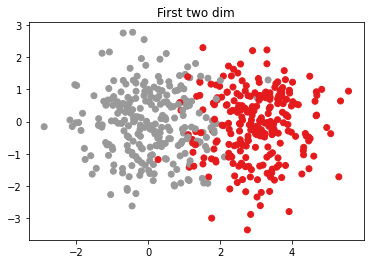

In [4]:
def generate_NLS(n, d, m, show = ""):
  # 1. Generate a 1 x n vector with equally probable -1s and 1s:
  y = np.transpose(np.random.choice([-1, 1], size = (1, n), p = [1/2, 1/2]))

  # 2. Generate X:

  # 2.1. First row - later on discarded
  X = np.zeros(d)
  
  # 2.2. Following rows depend on y:
  for element in y:
    if element == 1:
      X_element = np.random.normal(loc=0.0, scale=1.0, size=d)
      X = np.vstack((X, X_element))
    else:
      X_1st = np.random.normal(loc = m, scale = 1.0, size = 1)
      X_rest = np.random.normal(loc=0.0, scale=1.0, size= d - 1)
      X_element = np.hstack((X_1st,X_rest))
      X = np.vstack((X, X_element))

  # 2.3. Delete first row
  X = np.delete(X, 0, axis = 0)

  if show == "show":
    # 3. Generate results:
    results = np.hstack((X, y))

    # 4. Plot first 2 dimensions:
    plt.scatter(results.T[0], results.T[1], c = results.T[d], cmap = "Set1")
    plt.title("First two dim")  

  return X, y
  
X, y = generate_NLS(n = 500, d = 4, m = 3, show = "show")
np.hstack((X, y))

Perceptron Algorithm:

In [5]:
def perceptron(X, y, max_epoch, show = "", verbose = 0):
  
  # 1. Initialize variables:
  w = np.zeros(len(X[0]))
  epoch = 1
  results = np.hstack((X, y))
  d = X.shape[1]
  updates = []
  
  # 2. While loop:
  while epoch <= max_epoch:
      update = 0
      # Go row by row:
      for i, x in enumerate(X):
          
      # If the dot product times y element is equal to zero (first iteration, for instance) or if <X[i],w> has a different sign from y[i]
          if (np.dot(X[i], w) * y[i]) <= 0:
      
      # Update w
              w = w + X[i] * y[i]
              update = update + 1


      updates.append(update)
      

      if ((epoch%100 == 0) and (verbose == 1)): print("epoch: {}...".format(epoch))

      
      if update == 0:
        if verbose == 1:
          print("algorithm converged in {} epochs".format(epoch))
        break
      
      if epoch == max_epoch:
        if verbose == 1:
          print("algorithm stopped due to reaching max epochs")      
      
      epoch = epoch + 1

  if show == "show":
    plt.scatter(results.T[0], results.T[1], c = results.T[d], cmap = "Set1")
    plt.title("First two dim")  
    x1 = np.linspace(-10.0, 10.0, num=21)
    x2 = w[0] * x1 / w[1]
    #plt.plot(x1, x2)
    #plt.xlim([-2, 2])
    #plt.ylim([-2, 2])

  return w, updates

X, y = generate_LS(n = 600, d = 9, a = 0.1)
#X, y = generate_NLS(n = 500, d = 4, m = 3)
w, updates = perceptron(X, y, max_epoch = 2000, verbose = 1)

updates

algorithm converged in 5 epochs


[26, 12, 4, 2, 0]

In [6]:
def error(X, y, w):

  error = 0
  for i, x in enumerate(X):
      if (np.dot(X[i], w) * y[i]) <= 0:
          error += 1
        
  return error


## Separable cases:

### Large Margin:





**Number of updates required:**

I use this variable as a way to quantify how long it takes for the algorithm to converge.

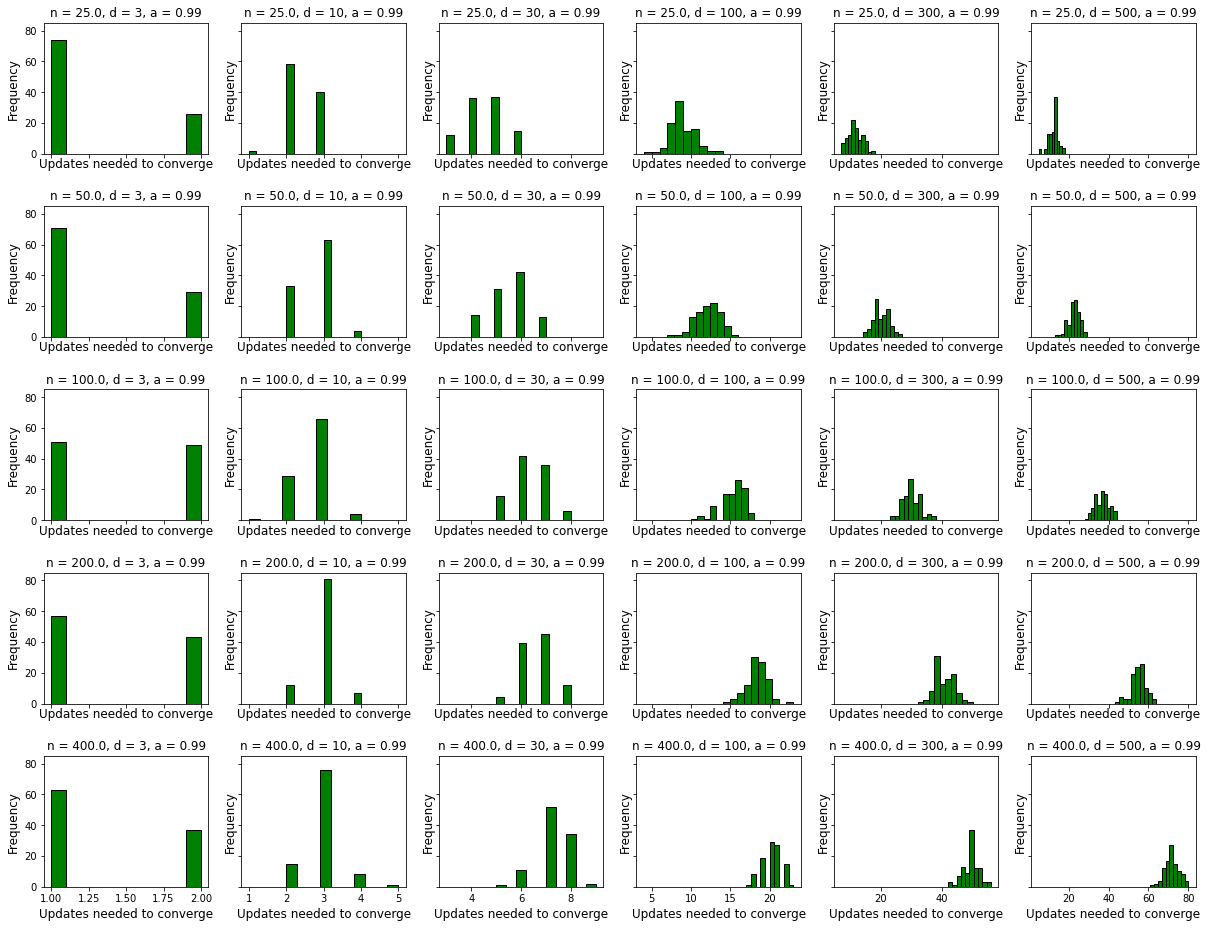

In [7]:
exps = 100
n = [50, 100, 200, 400, 800]
d = [3, 10, 30, 100, 300, 500]
a = [0.99]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_99 = {}
for k in range(len(a)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_LS(n[i], d[j], a[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 2000)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "green", ec="black")

      ax[i, j].set_xlabel('Updates needed to converge', fontsize = 12)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, a = {}'.format(n[i]/2, d[j], a[k]), fontsize = 12)
      
      errors_99["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i] #since train/test split is half and half


- For n fixed: the more dimensions the data has, the more updates needed for the perceptrons to converge, since the separating hyperplane is defined by more parameters.

- For d fixed: the more observations the data has, the more updates needed for the perceptrons to converge, since it goes through more cases.

**Probabilities of error:**

After training the perceptrons, I use them to classify the left out (50% of the generated) observations and compare the prediction to the actual label. The proportion of errors is as follows.

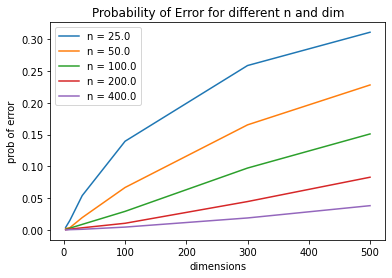

In [8]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_99["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
plt.legend()
plt.show()

- For n fixed: the higher the dimensions of the data, the higher the probability of error in the predictions of the perceptrons for the test sets. This makes sense, since the higher the dimensions, the bigger the space and the less likely the perceptron was trained with sufficient cases.

- For d fixed: the smaller n, the higher the probability of error, since the model has not seen enough cases to generalize well.

###Medium Margin:

Number of updates required to converge:

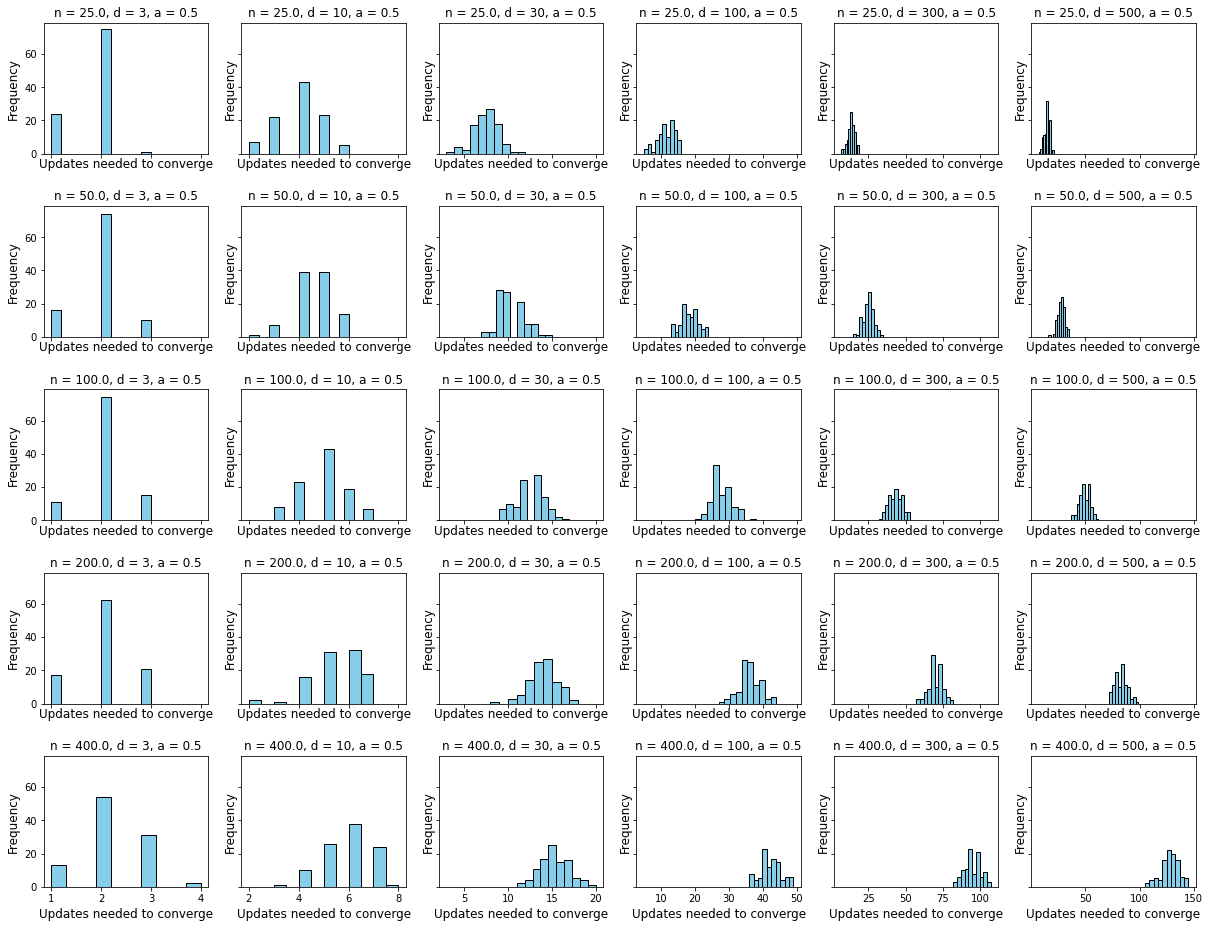

In [9]:
a = [0.5]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_50 = {}
for k in range(len(a)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_LS(n[i], d[j], a[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 2000)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "skyblue", ec="black")

      ax[i, j].set_xlabel('Updates needed to converge', fontsize = 12)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, a = {}'.format(n[i]/2, d[j], a[k]), fontsize = 12)
      
      errors_50["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i]

The conclusions here are the same as for the previous case.

Additionally, with a smaller margin, for fixed d and n, the number of updates needed to converge increases, in line with Novinkov's theorem results.

Probabilities of error:

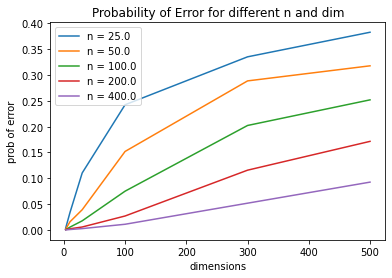

In [10]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_50["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
plt.legend()
plt.show()

The conclusions here are the same as for the previous case.

Additionally, with a smaller margin, the probabilities of error are generally higher, which makes sense since more precision is needed for correct classification.

### Small Margin:

Number of updates required to converge:

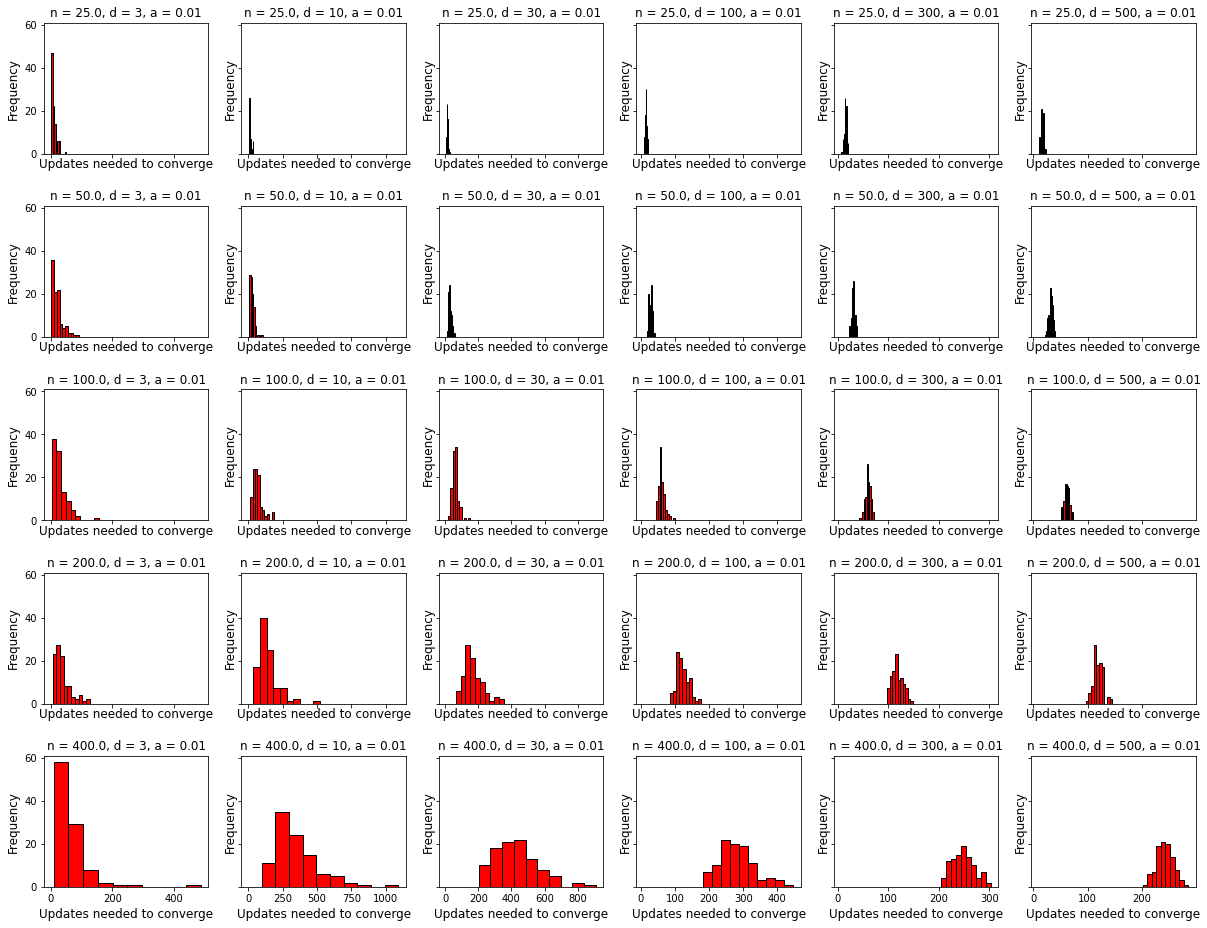

In [11]:
a = [0.01]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_01 = {}
for k in range(len(a)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_LS(n[i], d[j], a[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 20000)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "red", ec="black")

      ax[i, j].set_xlabel('Updates needed to converge', fontsize = 12)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, a = {}'.format(n[i]/2, d[j], a[k]), fontsize = 12)
      
      errors_01["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i]

- For fixed d, the conclusions are the same as in the previous case.
- For fixed n, thought, I observe an interesting behaviour. The number of updates needed to converge increase with dimensions up to a point and then decreases significantly. 

Probabilities of Error:

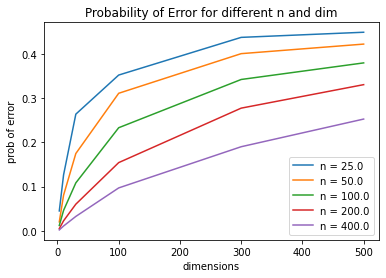

In [12]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_01["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
plt.legend()
plt.show()

The conclusions here are the same as for the previous case.

## Non separable cases:

###Significantly non separable:

"Significantly", due to lack of a better word. The idea is that for m close to 0, the two classes would be practically indistiguishable, and as m gets larger, the distinction between classes is more apparent, and the probability of getting a separable dataset increases.

Since the data is expected to be non separable, the number of updates done by the perceptron would never end. I set the a fixed amount of epochs (100) and count the updates (errors) made within that number of passes.

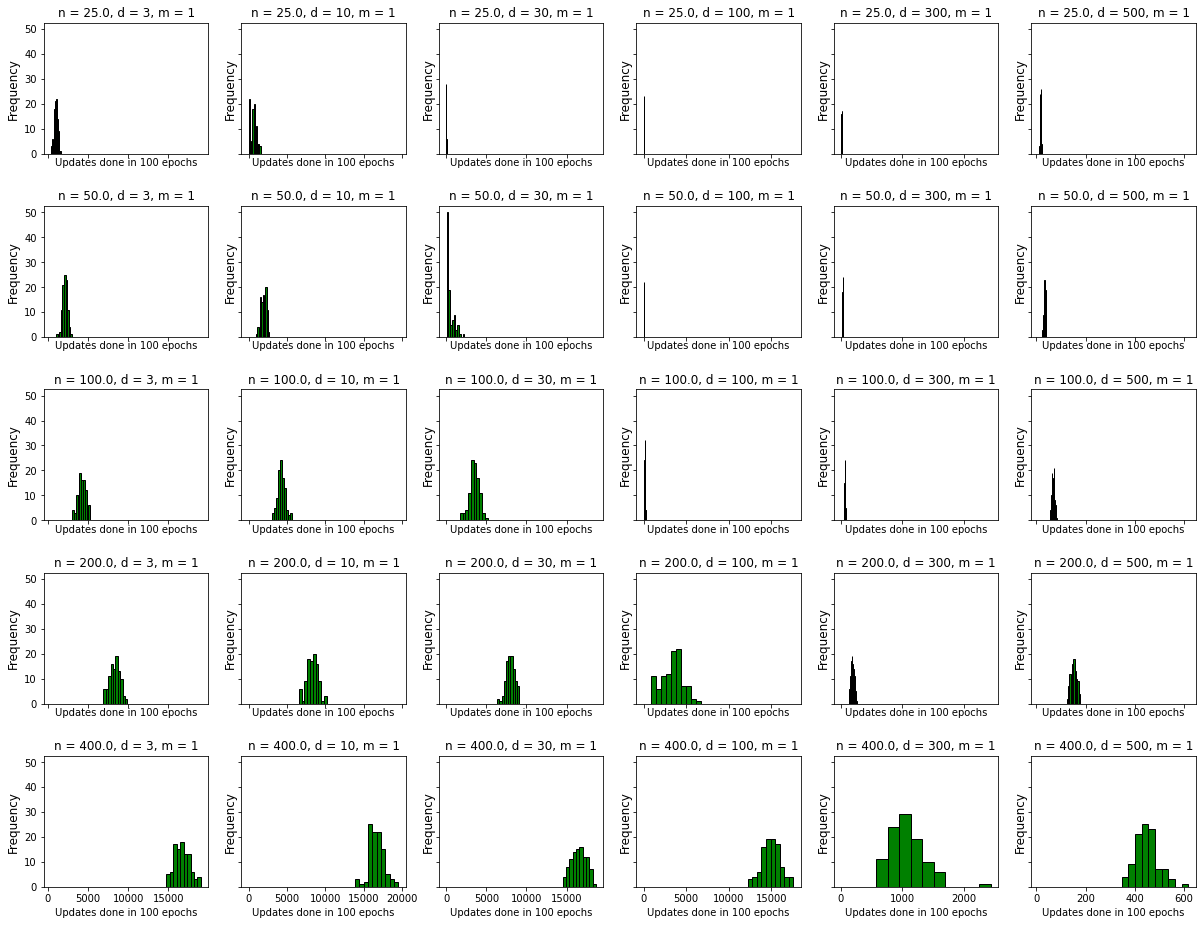

In [14]:
exps = 100
n = [50, 100, 200, 400, 800]
d = [3, 10, 30, 100, 300, 500]
m = [1]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_ns1 = {}

for k in range(len(m)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_NLS(n[i], d[j], m[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 100)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "green", ec="black")

      ax[i, j].set_xlabel('Updates done in 100 epochs', fontsize = 10)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, m = {}'.format(n[i]/2, d[j], m[k]), fontsize = 12)
      
      errors_ns1["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i] #since train/test split is half and half

- For d fixed: the more observations the data has, the more updates the algorithm makes, since it goes through more cases.

- For n fixed: as in the linearly separable case with small margin, there is an increase in the updates done but up to a point, where it starts decreasing. This can be associated with the concept that as dimensions increase, the points tend to be farther apart. Therefore for a relatively low number of points and high dimensions, many hyperplanes incur in low amounts of errors, and consecuently updates.


Probabilities of Error:



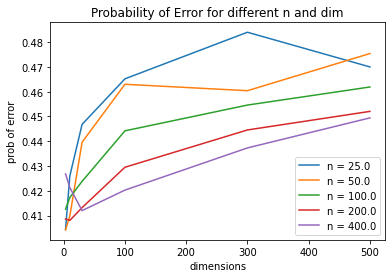

In [16]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_ns1["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
#plt.ylim(0,1)
plt.legend()
plt.show()

- For d fixed: the higher n, the lower the probability of error, which is in line with the idea that the perceptron has more data to learn from.

- For fixed n: as the dimensions increase, so does the probability of error. Again, possibly due to having fewer examples of the whole space of posiibilities.

### Somewhat non separable

Number of updates done for a fixed amount of epochs (100):

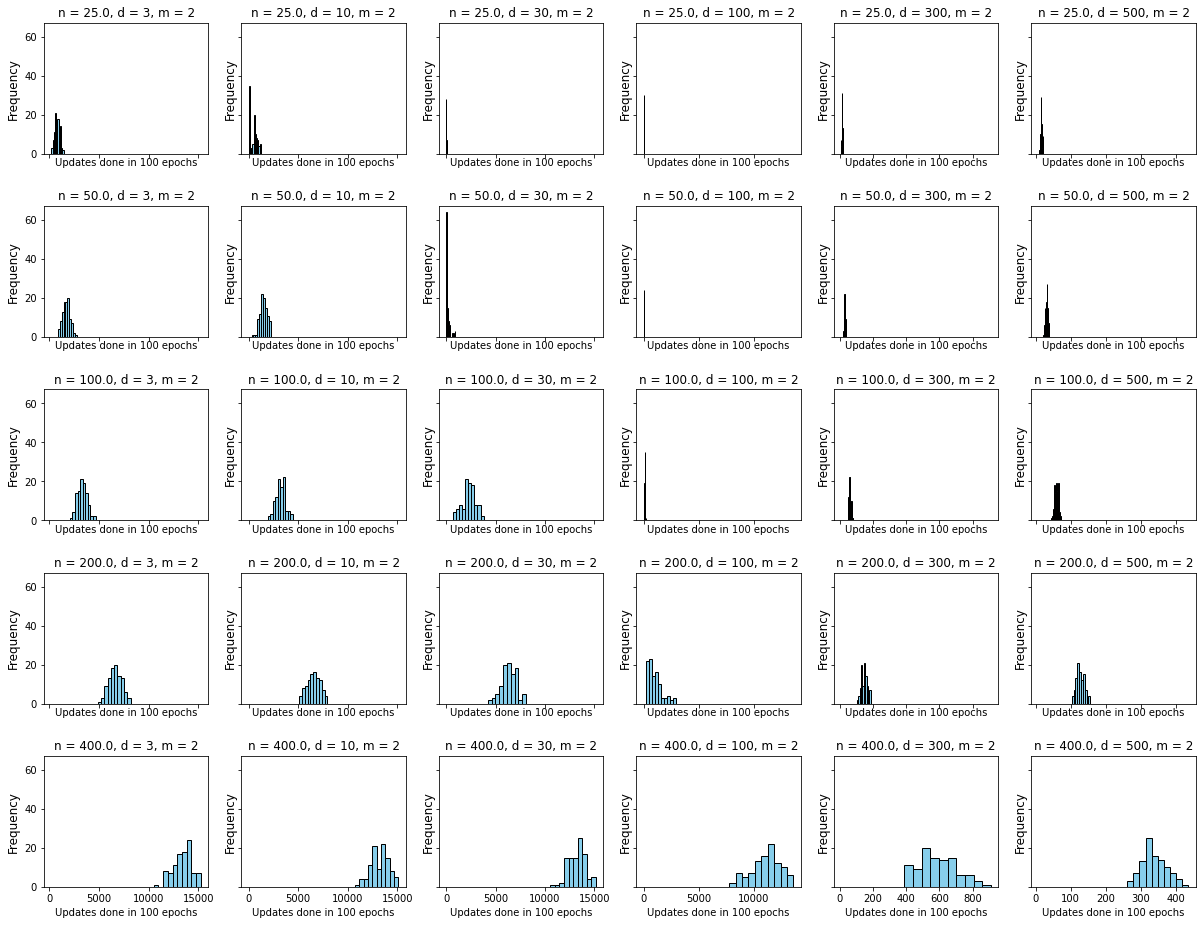

In [17]:
exps = 100
n = [50, 100, 200, 400, 800]
d = [3, 10, 30, 100, 300, 500]
m = [2]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_ns2 = {}

for k in range(len(m)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_NLS(n[i], d[j], m[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 100)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "skyblue", ec="black")

      ax[i, j].set_xlabel('Updates done in 100 epochs', fontsize = 10)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, m = {}'.format(n[i]/2, d[j], m[k]), fontsize = 12)
      
      errors_ns2["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i] #since train/test split is half and half

Same results as for the previous case, but generally lower levels of updates done, since the data is "more separated".

Probabilities of Error:


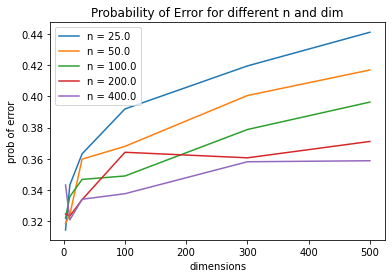

In [19]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_ns2["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
#plt.ylim(0,1)
plt.legend()
plt.show()

Again, same results as for the previous case, but generally lower levels of errors, since the data is "more separated".

### Slightly non separable

Number of updates done for a fixed amount of epochs (100):

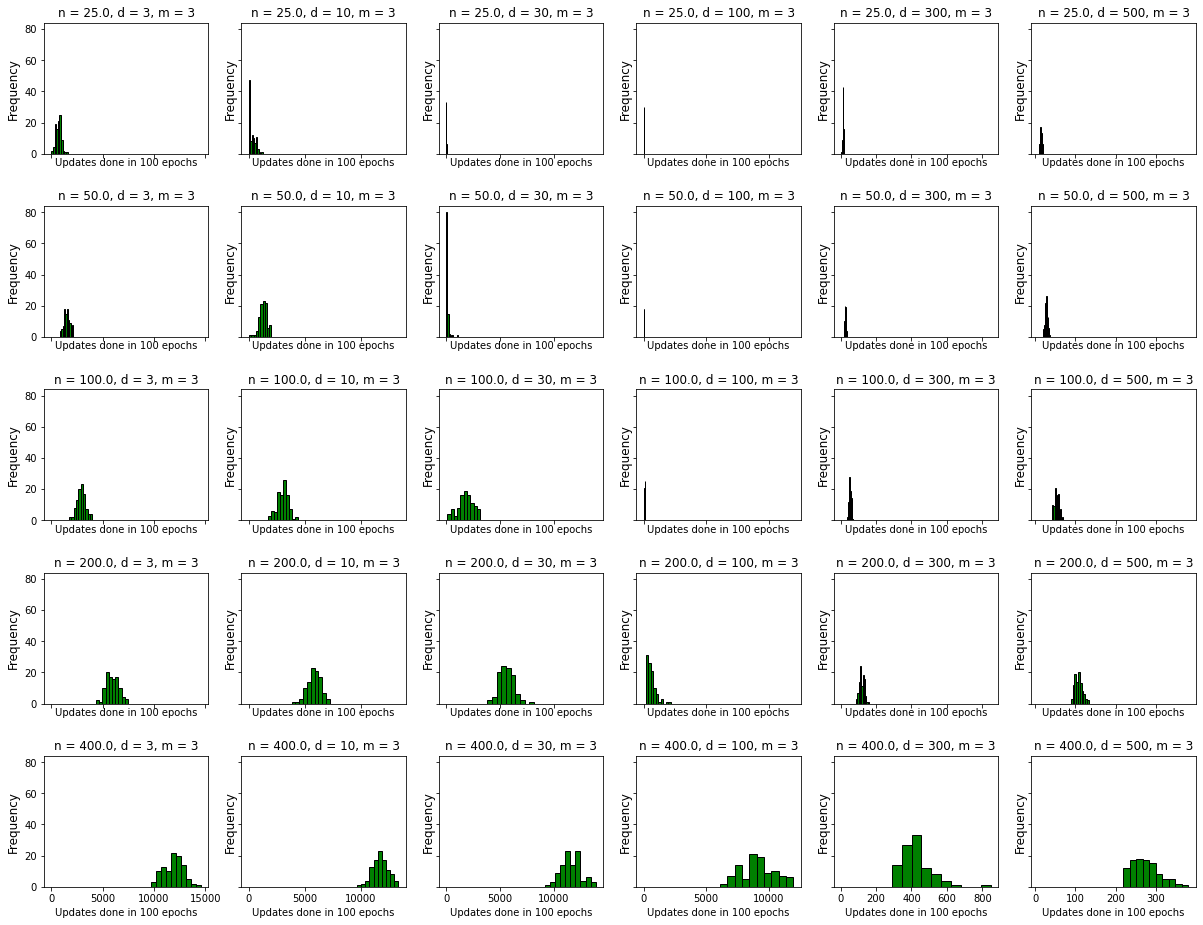

In [18]:
exps = 100
n = [50, 100, 200, 400, 800]
d = [3, 10, 30, 100, 300, 500]
m = [3]

fig, ax = plt.subplots(len(n), len(d), sharex="col", sharey="all", figsize=(20,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

errors_ns3 = {}

for k in range(len(m)):
  for i in range(len(n)):
    for j in range(len(d)):
      updates_req = []
      errors_made = []
      for exp in range(exps):
        
        X, y = generate_NLS(n[i], d[j], m[k])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        w, updates = perceptron(X_train, y_train, max_epoch = 100)
        updates_req.append(sum(updates))
        
        errors_made.append(error(X_test, y_test, w))

      ax[i, j].hist(updates_req, color = "green", ec="black")

      ax[i, j].set_xlabel('Updates done in 100 epochs', fontsize = 10)
      ax[i, j].set_ylabel('Frequency', fontsize = 12)
      ax[i, j].set_title('n = {}, d = {}, m = {}'.format(n[i]/2, d[j], m[k]), fontsize = 12)
      
      errors_ns3["n={} d={}".format(n[i], d[j])] = mean(errors_made)*2/n[i] #since train/test split is half and half

Probabilities of Error:


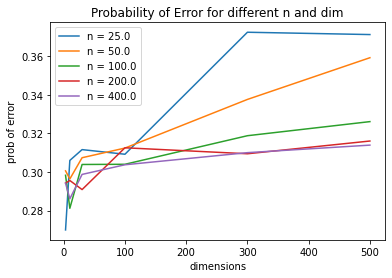

In [20]:
for i, ne in enumerate(n):  
  x_values = []
  y_values = []
  for j, de in enumerate(d):
    x_values.append(de)
    y_values.append(errors_ns3["n={} d={}".format(ne, de)])

  plt.plot(x_values, y_values, label = "n = {}".format(ne/2))

plt.title("Probability of Error for different n and dim")
plt.xlabel("dimensions")
plt.ylabel("prob of error")
#plt.ylim(0,1)
plt.legend()
plt.show()

The conclusions here are the same as in the previous point.

Comparison with Bayes' Risk

From the previous problem set, Bayes' risk is defined as:

$R^* = \frac{1}{2} - \frac{1}{4}  \int |\phi_1 (x) - \phi_0 (x) |\,dx \ $

Couldn't come up with a solution for the integral of the difference of the multivariate normal distributions. All the probabilities of error are below 0.5, nonetheless.